In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import numpy as np
import itertools
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

plt.style.use('default')

# PTM evaluation
## Load the data

In [2]:
based_dir='../saved_model/PTM_evaluation/'
datasets=[]
mods = ['Methyl','Dimethyl','Trimethyl','Acetyl','Succinyl','Propionyl','Crotonyl','Malonyl','Formyl','Oxidation',
       'Phospho','Carbamidomethyl','Deamidated','Nitro']

## iDeepLC modifications results

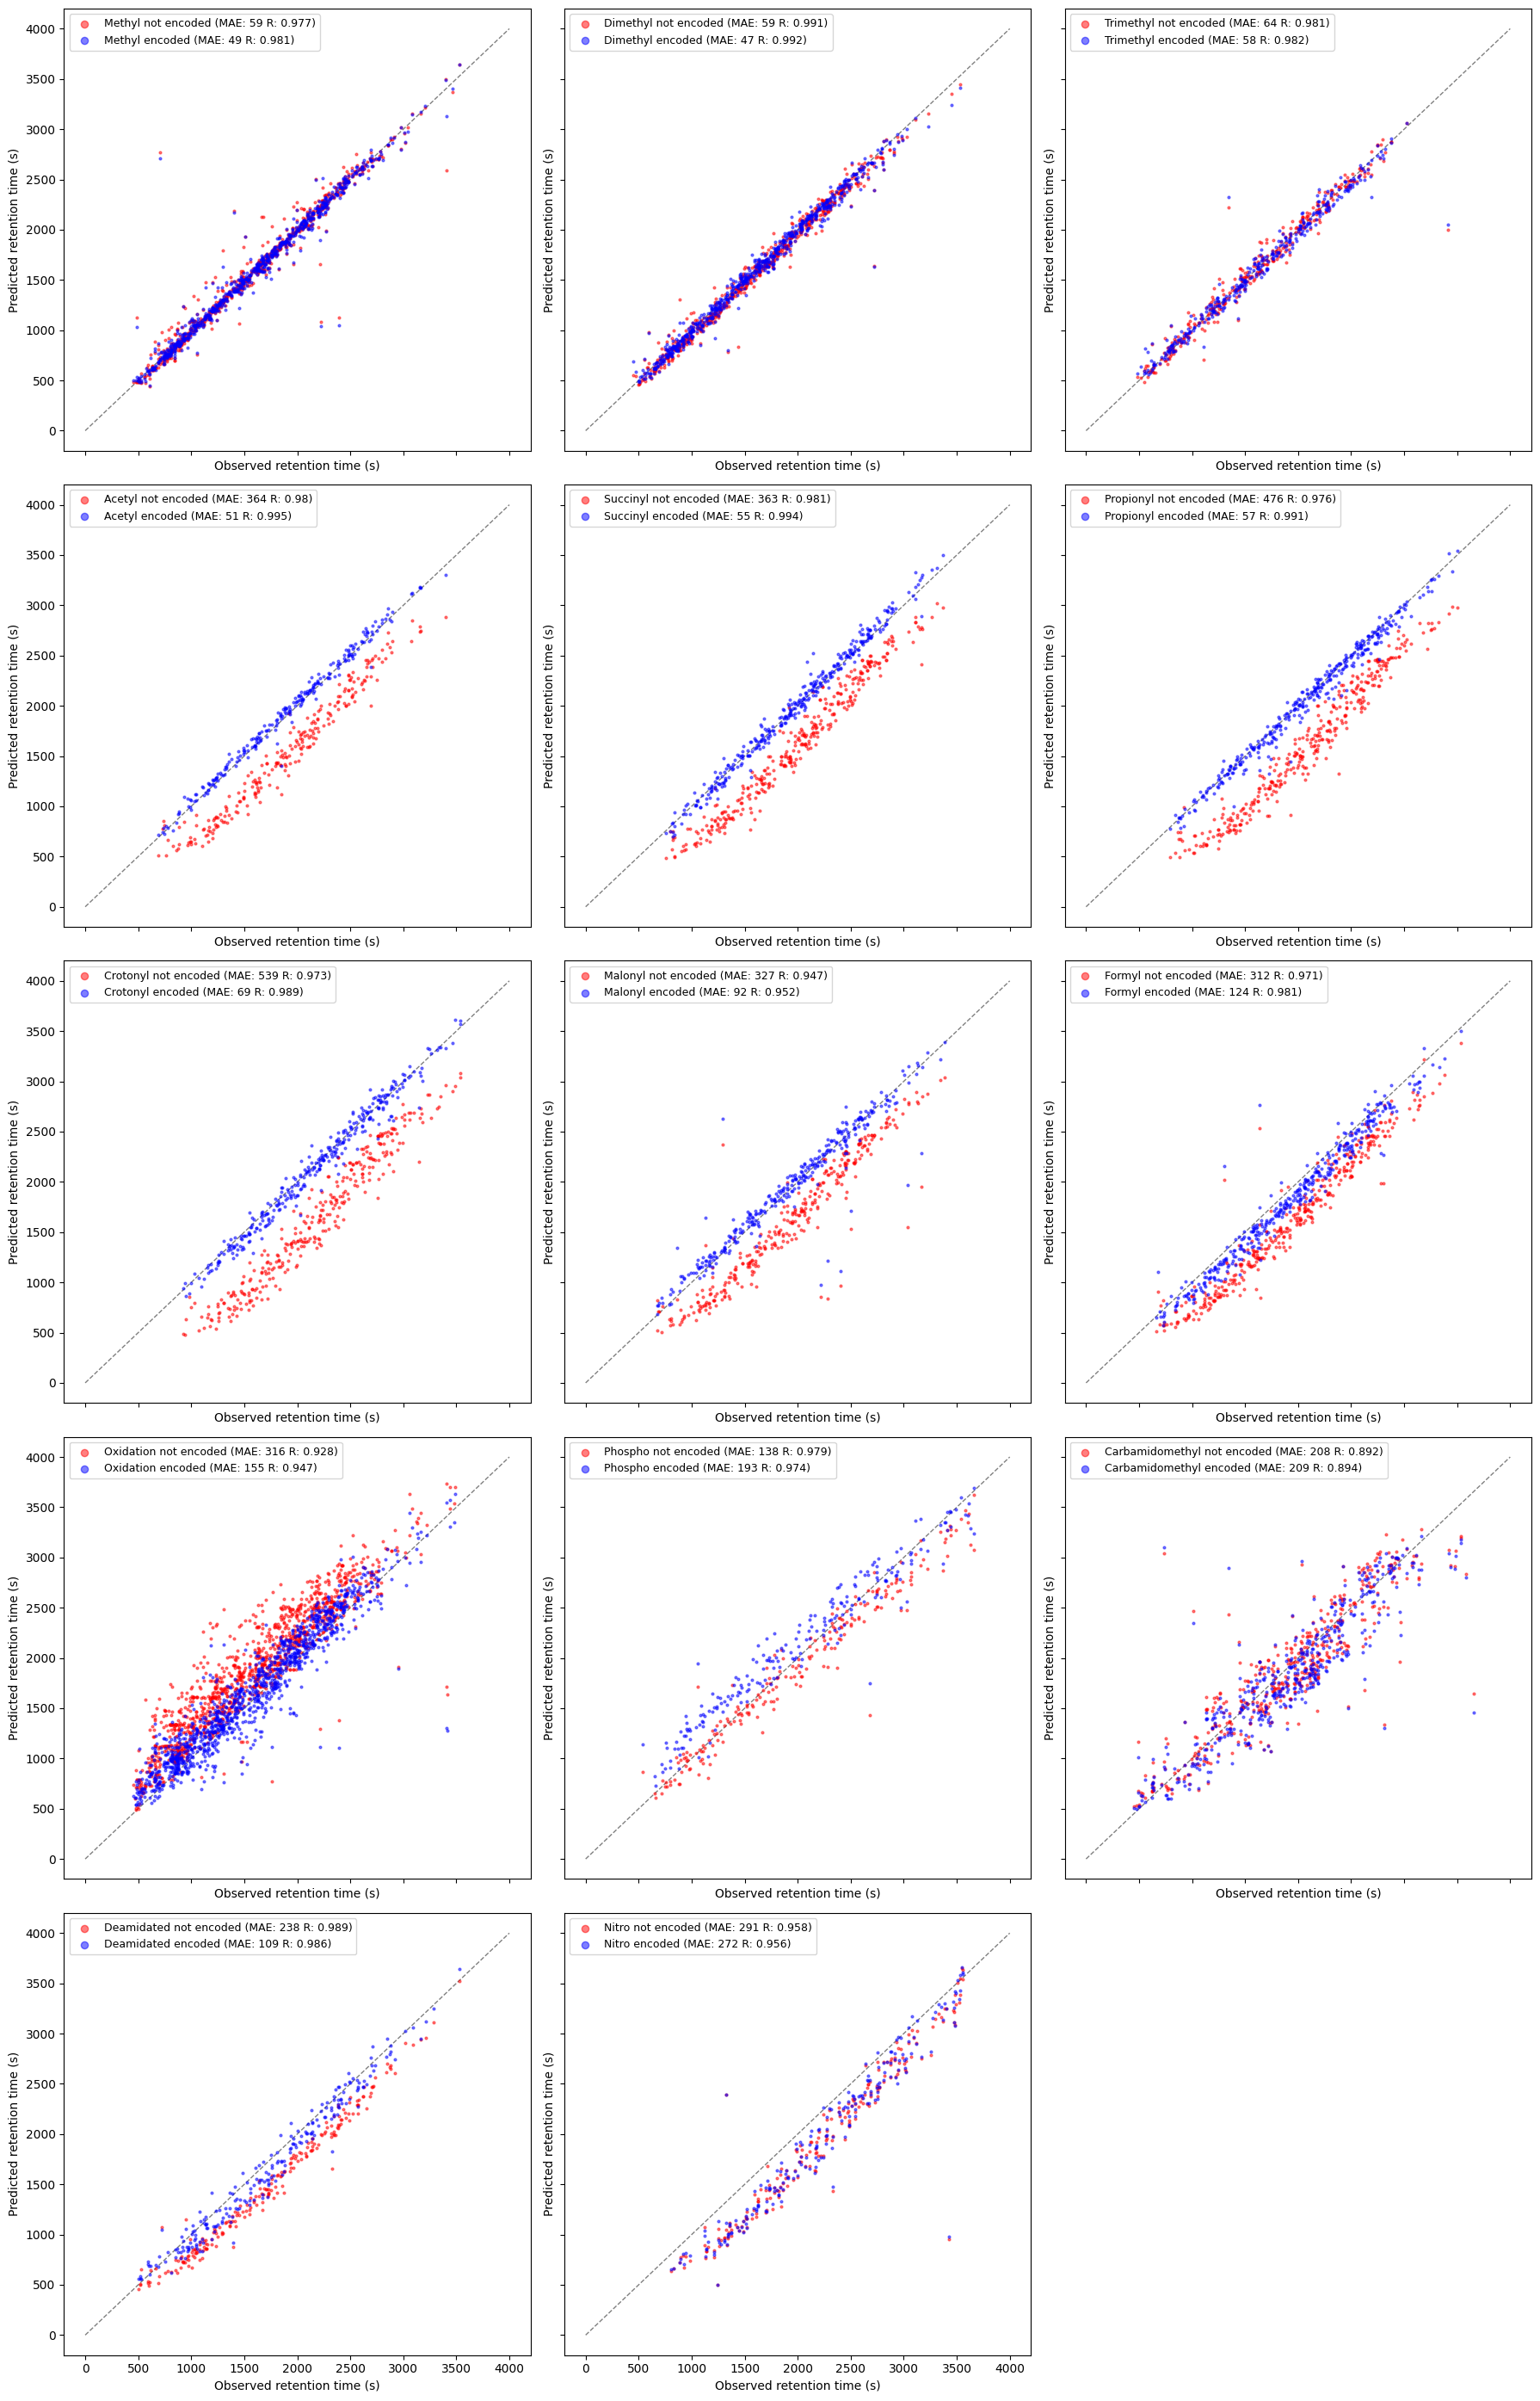

In [3]:

f, axes = plt.subplots(5,3,sharex=True,sharey=True,figsize=(18,28))

axes = list(itertools.chain(*axes))

mod_dict= {}
for ax,mod in zip(axes,mods):
    y_test, output_test_iDeepLC, output_test_no_mod = [pd.read_csv(based_dir + mod + '_best_results.csv')[col] for col in ['y_test', 'output_test', 'output_test_no_mod']]
    #change the following to the correct column names
    mae_iDeepLC = round(mean_absolute_error(y_test, output_test_iDeepLC) * 60)
    mae_no_mod = round(mean_absolute_error(y_test, output_test_no_mod) * 60)

    r_iDeepLC = round(np.corrcoef(y_test, output_test_iDeepLC)[0,1], 3)
    r_no_mod = round(np.corrcoef(y_test, output_test_no_mod)[0,1], 3)
    mod_dict[mod]=(mae_iDeepLC, r_iDeepLC, mae_no_mod, r_no_mod)

    ax.scatter(y_test * 60, output_test_no_mod * 60,
               alpha=0.5,
               s=4,
               c="red",
               label="%s not encoded (MAE: %s R: %s)" % (mod,mae_no_mod,r_no_mod))

    ax.scatter(y_test * 60, output_test_iDeepLC * 60,
               alpha=0.5,
               s=4,
               c="blue",
               label="%s encoded (MAE: %s R: %s)" % (mod, mae_iDeepLC, r_iDeepLC))
    ax.plot([0,4000],
             [0,4000],
             linestyle="--",
             linewidth=1.0,
             zorder=0,
             c="grey")
    lgnd = ax.legend(loc="upper left", prop={'size': 9})
    for handle in lgnd.legend_handles:
        handle.set_sizes([35.0])


    ax.set_xlabel("Observed retention time (s)")
    ax.set_ylabel("Predicted retention time (s)")

# f.savefig(based_dir+'iDeepLC.png',dpi=300)
plt.grid(False)
axes[-1].axis("off")
plt.tight_layout()
plt.savefig(based_dir+'iDeepLC.png',dpi=300)



## iDeepLC vs DeepLC scatter plots
DeepLC files have been downloaded from the DeepLC zenodo repository, from the following path: \figures\figures\predictions\mod_eval

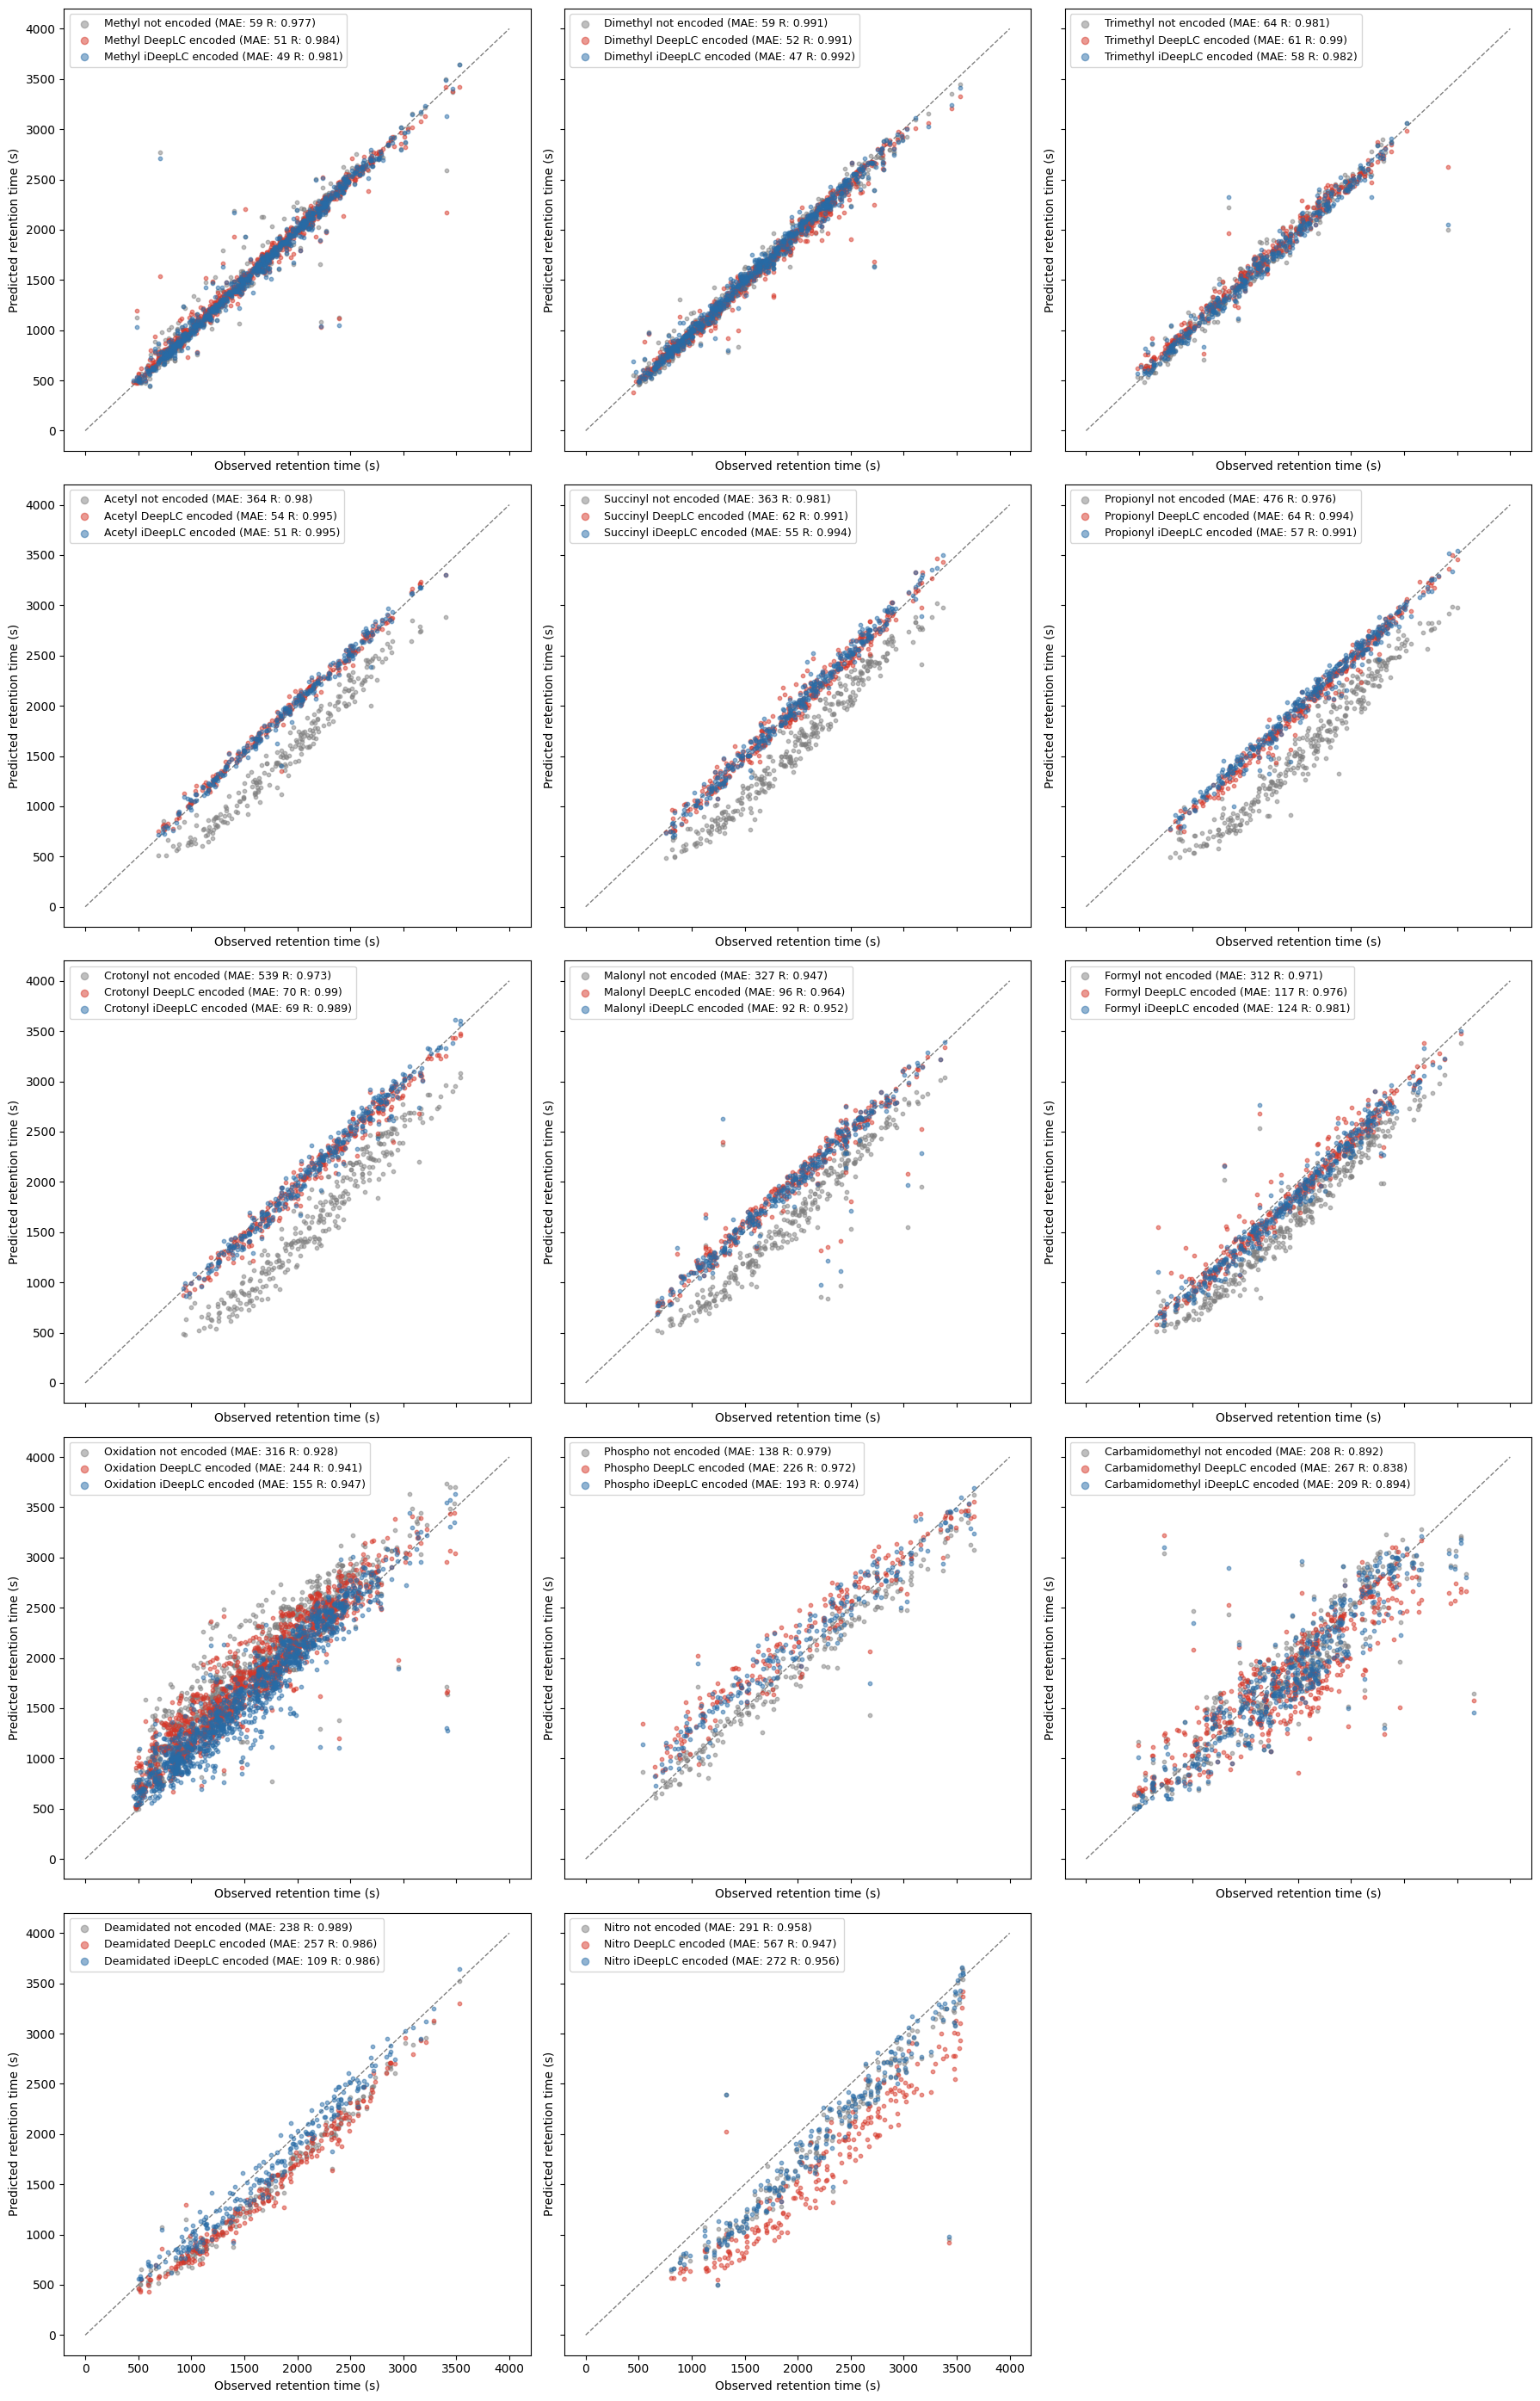

In [4]:
colors = ["grey", "#d63729", "#276ba6"]
alpha=0.5
# Define your figure and subplots
f, axes = plt.subplots(5, 3, sharex=True, sharey=True, figsize=(18, 28))
axes = list(itertools.chain(*axes))

mod_dict = {}
for ax, mod in zip(axes, mods):
    y_test, output_test_iDeepLC, output_test_no_mod = [pd.read_csv(based_dir + mod + '_best_results.csv')[col] for col in
                                                       ['y_test', 'output_test', 'output_test_no_mod']]
    output_test_DeepLC = pd.read_csv('../saved_model/PTM_evaluation_DeepLC/prosit_ptm_2020_' + mod + '_modanalysis_test.csv')['predictions']

    # Calculate metrics
    mae_iDeepLC = round(mean_absolute_error(y_test, output_test_iDeepLC) * 60)
    mae_DeepLC = round(mean_absolute_error(y_test, output_test_DeepLC) * 60)
    mae_no_mod = round(mean_absolute_error(y_test, output_test_no_mod) * 60)

    r_iDeepLC = round(np.corrcoef(y_test, output_test_iDeepLC)[0, 1], 3)
    r_DeepLC = round(np.corrcoef(y_test, output_test_DeepLC)[0, 1], 3)
    r_no_mod = round(np.corrcoef(y_test, output_test_no_mod)[0, 1], 3)
    mod_dict[mod] = (mae_iDeepLC, r_iDeepLC, mae_no_mod, r_no_mod)

    # Plot scatter plots
    ax.scatter(y_test * 60, output_test_no_mod * 60,
               alpha=alpha,
               s=10,
               c=colors[0],
               label="%s not encoded (MAE: %s R: %s)" % (mod, mae_no_mod, r_no_mod))

    ax.scatter(y_test * 60, output_test_DeepLC * 60,
               alpha=alpha,
               s=10,
               c=colors[1],
               label="%s DeepLC encoded (MAE: %s R: %s)" % (mod, mae_DeepLC, r_DeepLC))

    ax.scatter(y_test * 60, output_test_iDeepLC * 60,
               alpha=alpha,
               s=10,
               c=colors[2],
               label="%s iDeepLC encoded (MAE: %s R: %s)" % (mod, mae_iDeepLC, r_iDeepLC))

    ax.plot([0, 4000],
            [0, 4000],
            linestyle="--",
            linewidth=1.0,
            zorder=0,
            c="grey")

    # Customize legend and labels
    lgnd = ax.legend(loc="upper left", prop={'size': 9})
    for handle in lgnd.legend_handles:
        handle.set_sizes([35.0])

    ax.set_xlabel("Observed retention time (s)")
    ax.set_ylabel("Predicted retention time (s)")

# Turn off the last subplot
axes[-1].axis("off")

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(based_dir + 'iDeepLC_DeepLC.png', dpi=300)


# iDeepLC vs DeepLC boxplots

In [5]:
barplot_df_list = []
mod_dict = {}
for  mod in  mods:
    y_test, output_test_iDeepLC, output_test_no_mod = [pd.read_csv(based_dir + mod + '_best_results.csv')[col] for col in
                                                       ['y_test', 'output_test', 'output_test_no_mod']]
    output_test_DeepLC = pd.read_csv('../saved_model/PTM_evaluation_DeepLC/prosit_ptm_2020_' + mod + '_modanalysis_test.csv')['predictions']
    mae_iDeepLC = round(mean_absolute_error(y_test, output_test_iDeepLC) * 60)
    mae_DeepLC = round(mean_absolute_error(y_test, output_test_DeepLC) * 60)
    mae_no_mod = round(mean_absolute_error(y_test, output_test_no_mod) * 60)
    encoded_error = y_test * 60 - output_test_iDeepLC * 60
    no_mod_error = y_test * 60 - output_test_no_mod * 60
    deeplc_error = y_test * 60 - output_test_DeepLC * 60

    r_iDeepLC = round(np.corrcoef(y_test, output_test_iDeepLC)[0, 1], 3)
    r_DeepLC = round(np.corrcoef(y_test, output_test_DeepLC)[0, 1], 3)
    r_no_mod = round(np.corrcoef(y_test, output_test_no_mod)[0, 1], 3)
    mod_not_enc = pd.DataFrame({'predictions': output_test_no_mod, 'error': no_mod_error, 'encoding': 'Not encoded', 'm': mod})
    mod_enc = pd.DataFrame({'predictions': output_test_iDeepLC, 'error': encoded_error, 'encoding': 'Encoded iDeepLC', 'm': mod})

    mod_deeplc = pd.DataFrame({'predictions': output_test_DeepLC, 'error': deeplc_error, 'encoding': 'Encoded DeepLC', 'm': mod})

    # Calculate MAE and correlation for each DataFrame
    mod_enc['mae'] = mae_iDeepLC
    mod_not_enc['mae'] = mae_no_mod
    mod_deeplc['mae'] = mae_DeepLC
    mod_enc['R'] = r_iDeepLC
    mod_not_enc['R'] = r_no_mod
    mod_deeplc['R'] = r_DeepLC

    # Concatenate the DataFrames for encoded and non-encoded data
    barplot_df = pd.concat([ mod_not_enc,  mod_deeplc,mod_enc])

    # Append the concatenated DataFrame to the list
    barplot_df_list.append(barplot_df)

# Concatenate all DataFrames in the list to create the final DataFrame
final_barplot_df = pd.concat(barplot_df_list)


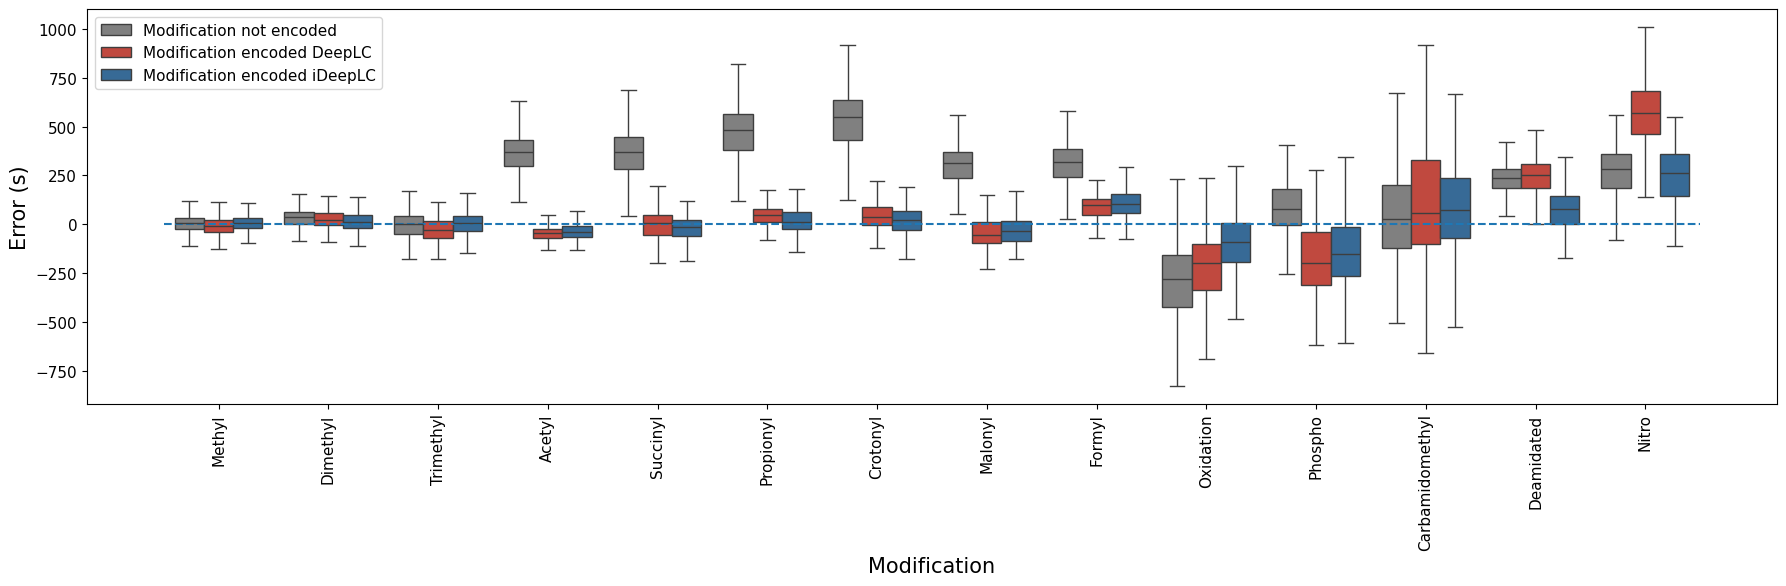

In [6]:
plt.figure(figsize=[18,6])

plt.rcParams.update({'font.size': 11})

sns.boxplot(x="m",
            y="error",
            hue="encoding",
            data=final_barplot_df,
            palette=["grey", "#d63729", "#276ba6"],
            fliersize=2,
            showfliers=False)

ax = plt.gca()
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Modification not encoded",  "Modification encoded DeepLC", "Modification encoded iDeepLC",])
ax = plt.gca()
plt.xlabel("Modification", fontsize=15)
plt.ylabel("Error (s)", fontsize=15)
plt.hlines(y=0,xmin=-0.5,xmax=13.5,linestyle="--")
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.savefig(based_dir+'boxplot.png',dpi=300)

# iDeepLC and DeepLC MAE comparison

In [7]:
from adjustText import adjust_text
mods = ["Methyl", "Dimethyl", "Trimethyl", "Acetyl", "Succinyl", "Propionyl",
        "Crotonyl", "Malonyl", "Formyl", "Oxidation", "Phospho",
        "Carbamidomethyl", "Deamidated", "Nitro"]
# Initialize lists to store computed MAEs
mae_baseline, mae_DeepLC, mae_iDeepLC = [], [], []
# Compute MAEs for each PTM
for mod in mods:
    # Read required columns from CSV files
    y_test, output_test_iDeepLC, output_test_no_mod = [
        pd.read_csv(based_dir + mod + '_best_results.csv')[col]
        for col in ['y_test', 'output_test', 'output_test_no_mod']
    ]
    output_test_DeepLC = pd.read_csv(
        '../saved_model/PTM_evaluation_DeepLC' + '/prosit_ptm_2020_' + mod + '_modanalysis_test.csv'
    )['predictions']

    # Calculate MAEs
    mae_baseline.append(round(mean_absolute_error(y_test, output_test_no_mod) * 60))
    mae_DeepLC.append(round(mean_absolute_error(y_test, output_test_DeepLC) * 60))
    mae_iDeepLC.append(round(mean_absolute_error(y_test, output_test_iDeepLC) * 60))

# Create DataFrame dynamically
df = pd.DataFrame({
    "PTM": mods,
    "baseline": mae_baseline,
    "DeepLC": mae_DeepLC,
    "iDeepLC": mae_iDeepLC
})
df['DeepLC_decrease'] = round(((df['baseline'] - df['DeepLC']) / df['baseline']) * 100)
df['iDeepLC_decrease'] = round(((df['baseline'] - df['iDeepLC']) / df['baseline']) * 100)

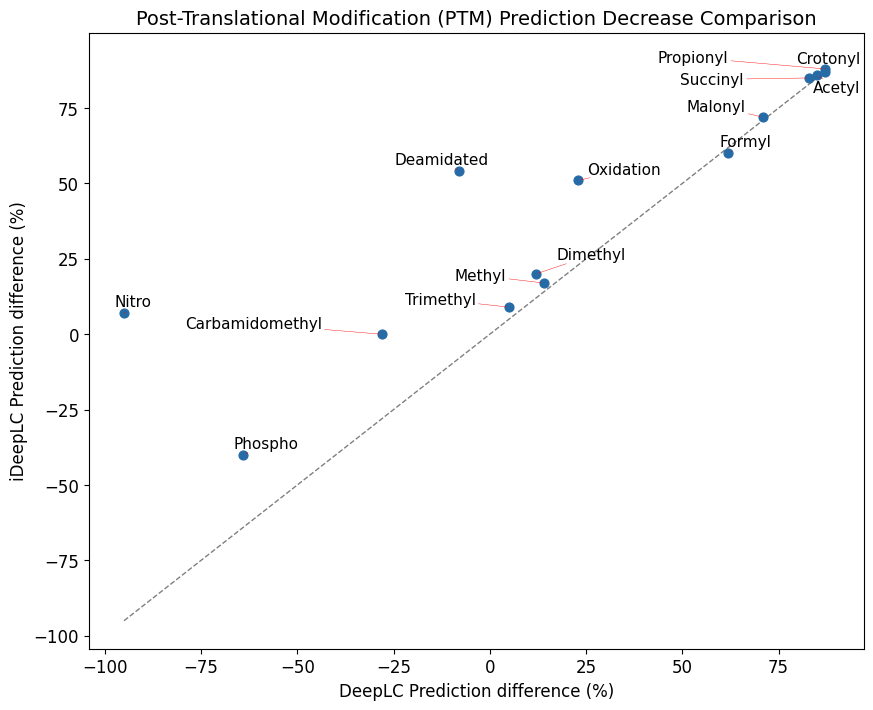

In [8]:
plt.figure(figsize=(10, 8))
# Create the scatter plot
plt.scatter(df['DeepLC_decrease'], df['iDeepLC_decrease'], s=40, c="#276ba6",)

# Annotate each point with the PTM name. Adjust text alignment for better legibility
texts = []
for i, txt in enumerate(df['PTM']):
    # Offset the text slightly to avoid starting exactly at the point which can look cluttered
    texts.append(plt.text(df['DeepLC_decrease'][i], df['iDeepLC_decrease'][i], txt, ha='right', va='bottom'))

adjust_text(texts, only_move={'points': 'xy', 'texts': 'xy', },expand=(2,2), arrowprops=dict(arrowstyle="->", color='r', lw=0.3))

plt.title('Post-Translational Modification (PTM) Prediction Decrease Comparison', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
min_val = min(df['DeepLC_decrease'].min(), df['iDeepLC_decrease'].min())
max_val = max(df['DeepLC_decrease'].max(), df['iDeepLC_decrease'].max())
# Add a diagonal line representing y=x for reference
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", linewidth=1.0, zorder=0, c="grey")
plt.xlabel('DeepLC Prediction difference (%)', fontsize=12)
plt.ylabel('iDeepLC Prediction difference (%)', fontsize=12)
plt.savefig(based_dir + 'iDeepLC_DeepLC_comparison.png', dpi=300)

# Modified glycine evaluation
## Load the data for two of the datasets

In [9]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

paths= ['../saved_model/modified_glycine_evaluation/heladeeprt/','../saved_model/modified_glycine_evaluation/diahf/']

MAE of AA : encoded, not encoded
A : 7.40100788618049 9.65272414721969
C : 4.837852917250925 4.633314660568017
D : 7.35305589684546 7.824569062943318
E : 5.740797370776796 8.849206807141954
F : 7.176368737063872 38.55811074099004
H : 24.12969947338337 21.06670468652929
I : 5.0340088904938325 32.42604182690974
K : 32.576234780796824 23.85649103026747
L : 9.127030240418765 50.38831049389913
M : 7.012037298632234 17.343737554437087
N : 5.75856788702516 4.771768105888091
P : 11.747650062735072 10.224771714397885
Q : 5.588421516069453 5.195050704338993
R : 14.228612119161697 18.899034575294706
S : 8.37399687621581 5.027619688086951
T : 8.359547007815655 6.3294775372144825
V : 5.607198514154819 23.123423197825236
W : 6.400031834123939 36.055024914176286
Y : 15.675387384524472 16.95701222099994
rs 10.111974036508878 r_gs 17.95696808784886


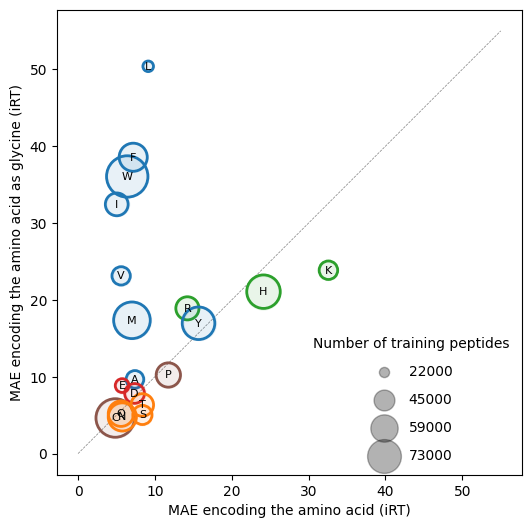

MAE of AA : encoded, not encoded
A : 4.903638909887041 5.918720803782401
C : 3.496086269773411 3.5897567174181177
D : 5.2074432705006855 4.789425974314265
E : 5.0611653795313565 5.4909002041994865
F : 5.333611035528993 16.98030905687172
H : 3.802704822747776 3.813343584175056
I : 4.9371325217589765 15.298320272292951
K : 9.251935119148182 4.200548742514553
L : 5.481847348756419 20.29771104257315
M : 3.8931822183615568 7.515189311758343
N : 4.388015572479582 4.253764105609038
P : 7.355377664284767 7.439500440407526
Q : 4.384282295774474 4.33094943018338
R : 3.4781162320441292 3.5014944594004085
S : 7.569322860519605 7.429478455580685
T : 4.678982465246687 4.60025679750148
V : 4.260608759368694 9.933719137117883
W : 3.8398776390438982 16.984198317754842
Y : 4.884007956880947 9.305818889112157
rs 5.0635441232440614 r_gs 8.193337144345657


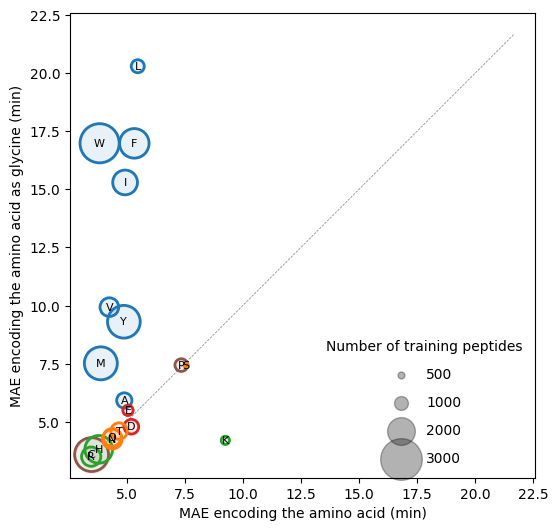

In [10]:
aas = ['A', 'C', 'D', 'E', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# Define colors for categories of amino acids
aa_colors = {
    "C2": ["R", "H", "K"],   # Basic
    "C3": ["E", "D"],        # Acidic
    "C1": ["S", "T", "N", "Q"],  # Polar uncharged
    "C5": ["C", "G", "P"],   # Special cases
    "C0": ["A", "I", "L", "M", "F", "W", "Y", "V"]  # Hydrophobic
}

datasets = [
    {
        "name": "DIA HF",
        "paths": [paths[1]],
        "num_train_pep": {
            'A': 38100, 'C': 83227, 'D': 42703, 'E': 29815, 'F': 60725, 'H': 72387,
            'I': 49251, 'K': 40023, 'L': 22826, 'M': 79123, 'N': 60853, 'P': 52536,
            'Q': 55067, 'R': 49965, 'S': 41493, 'T': 48686, 'V': 39650, 'W': 89395, 'Y': 70405
        },
        "scatter_scale": 3000.0,
        "mae_correction": 1.0,
        "legend_values": [22000, 45000, 59000, 73000],
        "xlabel": "MAE encoding the amino acid (iRT)",
        "ylabel": "MAE encoding the amino acid as glycine (iRT)",
        "plot_limits": (0.0, 55)
    },
    {
        "name": "HeLa DeepRT",
        "paths": [paths[0]],
        "num_train_pep": {
            'A': 1098, 'C': 2442, 'D': 1056, 'E': 742, 'F': 2127, 'H': 1996,
            'I': 1781, 'K': 594, 'L': 937, 'M': 2373, 'N': 1408, 'P': 914,
            'Q': 1277, 'R': 1388, 'S': 297, 'T': 1187, 'V': 1344, 'W': 2819, 'Y': 2354
        },
        "scatter_scale": 100.0,
        "mae_correction": 60.0,
        "legend_values": [500, 1000, 2000, 3000],
        "xlabel": "MAE encoding the amino acid (min)",
        "ylabel": "MAE encoding the amino acid as glycine (min)",
        "plot_limits": (240.0 / 60.0, 1300.0 / 60.0)
    }
]

def get_color(aa):
    """Assigns a color category to each amino acid."""
    for color, group in aa_colors.items():
        if aa in group:
            return color
    return "grey"

def plot_results(dataset,  path):
    """Processes data and creates scatter plots for a given dataset."""
    plt.figure(figsize=(6, 6.5))
    rs, r_gs = [], []
    print('MAE of AA : encoded, not encoded')

    for aa in aas:
        df = pd.read_csv(f"{path}{aa}_best_results.csv", index_col=0)
        r = sum(abs(df["output_test"] / dataset["mae_correction"] - df["y_test"] / dataset["mae_correction"])) / len(df.index)
        r_glyc = sum(abs(df["output_test_g"] / dataset["mae_correction"] - df["y_test"] / dataset["mae_correction"])) / len(df.index)

        print(aa, ':', r, r_glyc)
        rs.append(r)
        r_gs.append(r_glyc)

        col_point = get_color(aa)
        scatter_size = (dataset["num_train_pep"][aa] / dataset["scatter_scale"]) ** 2

        plt.scatter(r, r_glyc, s=scatter_size, facecolors=col_point, linewidths=2, alpha=0.1, edgecolors=col_point)
        plt.scatter(r, r_glyc, s=scatter_size, facecolors="none", linewidths=2, edgecolors=col_point)

        ax = plt.gca()
        ax.annotate(aa, xy=(r, r_glyc), fontsize=8, verticalalignment='center', horizontalalignment='center')
        ax.set_aspect('equal')
        ax.autoscale_view()

    rs_avg = sum(rs) / 19
    r_gs_avg = sum(r_gs) / 19
    print('rs', rs_avg, 'r_gs', r_gs_avg)

    # Legend for training peptides
    for num_train in dataset["legend_values"]:
        plt.scatter([], [], c='k', alpha=0.3, s=(num_train / dataset["scatter_scale"]) ** 2, label=str(num_train))

    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Number of training peptides')

    # Plot diagonal reference line
    plt.plot([dataset["plot_limits"][0], dataset["plot_limits"][1]],
             [dataset["plot_limits"][0], dataset["plot_limits"][1]],
             c="grey", linestyle="--", linewidth=0.5, zorder=0)

    plt.xlabel(dataset["xlabel"])
    plt.ylabel(dataset["ylabel"])
    plt.savefig(f"{path}{dataset['name']}_best.png", dpi=300)
    plt.show()

# Main processing loop
for dataset in datasets:
    for path in dataset["paths"]:
        plot_results(dataset, path)


# PTM evaluation iDeepLC vs DeepLC
DeepLC files have been downloaded from the DeepLC zenodo repository, from the following path: \figures\figures\predictions\aa_cv

aa : encoded, not encoded
A : 7.40100788618049 8.338636692875761
C : 4.837852917250925 6.071906890736484
D : 7.35305589684546 7.551487204921695
E : 5.740797370776796 6.881670744234254
F : 7.176368737063872 8.762352129874545
H : 24.12969947338337 26.951082159261635
I : 5.0340088904938325 4.609934558434354
K : 32.576234780796824 37.305759528268425
L : 9.127030240418765 10.111388070600793
M : 7.012037298632234 9.532432896592349
N : 5.75856788702516 6.936894060340518
P : 11.747650062735072 13.064586414616103
Q : 5.588421516069453 6.155546542592057
R : 14.228612119161697 8.89839276703159
S : 8.37399687621581 5.69548485889318
T : 8.359547007815655 4.3791948954611755
V : 5.607198514154819 4.860190902599763
W : 6.400031834123939 38.0299433798602
Y : 15.675387384524472 9.830868579060954
rs 10.111974036508878 r_gs 11.787776488223992


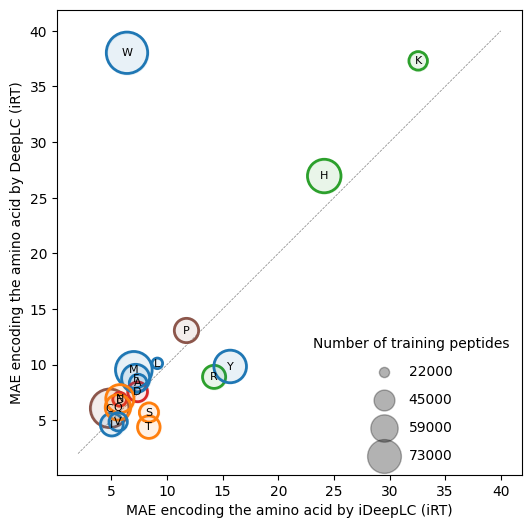

aa : encoded, not encoded
A : 4.903638909887041 5.31392170727191
C : 3.496086269773411 3.38276388996683
D : 5.2074432705006855 6.027094898492688
E : 5.0611653795313565 5.940180131135136
F : 5.333611035528993 4.812245427279626
H : 3.802704822747776 4.0602388636944395
I : 4.9371325217589765 4.445742511445746
K : 9.251935119148182 8.979941634517324
L : 5.481847348756419 9.039306014560578
M : 3.8931822183615568 4.383951076112342
N : 4.388015572479582 4.806461963807505
P : 7.355377664284767 8.48181529091607
Q : 4.384282295774474 5.808947838609434
R : 3.4781162320441292 4.681947004944932
S : 7.569322860519605 7.478999394343363
T : 4.678982465246687 4.83417832827922
V : 4.260608759368694 4.6481285640518655
W : 3.8398776390438982 7.559290888935219
Y : 4.884007956880947 5.5910259923360766
rs 5.0635441232440614 r_gs 5.804009548457911


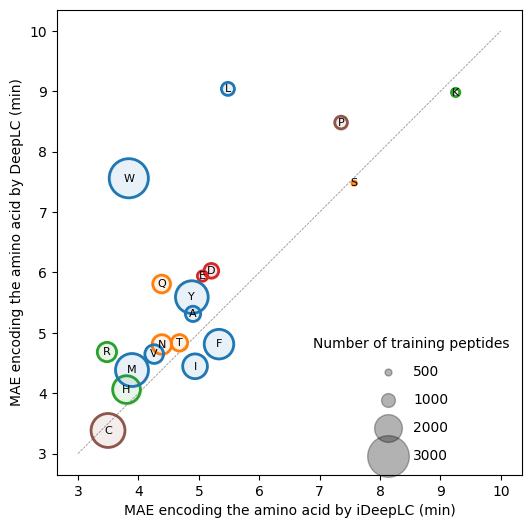

In [11]:
aas = ['A', 'C', 'D', 'E', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

aa_colors = {
    "C2": ["R", "H", "K"],   # Basic
    "C3": ["E", "D"],        # Acidic
    "C1": ["S", "T", "N", "Q"],  # Polar uncharged
    "C5": ["C", "G", "P"],   # Special cases
    "C0": ["A", "I", "L", "M", "F", "W", "Y", "V"]  # Hydrophobic
}

datasets = [
    {
        "name": "DIA HF",
        "paths": [paths[1]],
        "num_train_pep": {
            'A': 38100, 'C': 83227, 'D': 42703, 'E': 29815, 'F': 60725, 'H': 72387,
            'I': 49251, 'K': 40023, 'L': 22826, 'M': 79123, 'N': 60853, 'P': 52536,
            'Q': 55067, 'R': 49965, 'S': 41493, 'T': 48686, 'V': 39650, 'W': 89395, 'Y': 70405
        },
        "scatter_scale": 3000.0,
        "mae_correction": 1.0,
        "apply_correction": False, # No need to apply division by 649.428 for this dataset
        "deeplc_file_prefix": "../saved_model/modified_glycine_evaluation_DeepLC/PXD005573_mcp_",
        "legend_values": [22000, 45000, 59000, 73000],
        "xlabel": "MAE encoding the amino acid by iDeepLC (iRT)",
        "ylabel": "MAE encoding the amino acid by DeepLC (iRT)",
        "plot_limits": (2, 40),
    },
    {
        "name": "HeLa DeepRT",
        "paths": [paths[0]],
        "num_train_pep": {
            'A': 1098, 'C': 2442, 'D': 1056, 'E': 742, 'F': 2127, 'H': 1996,
            'I': 1781, 'K': 594, 'L': 937, 'M': 2373, 'N': 1408, 'P': 914,
            'Q': 1277, 'R': 1388, 'S': 297, 'T': 1187, 'V': 1344, 'W': 2819, 'Y': 2354
        },
        "scatter_scale": 100.0,
        "mae_correction": 60.0,
        "apply_correction": True, # Apply division by 649.428 for this dataset
        "deeplc_file_prefix": "../saved_model/modified_glycine_evaluation_DeepLC/mod_fixed_mods_",
        "legend_values": [500, 1000, 2000, 3000],
        "xlabel": "MAE encoding the amino acid by iDeepLC (min)",
        "ylabel": "MAE encoding the amino acid by DeepLC (min)",
        "plot_limits": (3, 10),
    }
]

def get_color(aa):
    """Assigns a color category to each amino acid."""
    for color, group in aa_colors.items():
        if aa in group:
            return color
    return "grey"

def plot_results(dataset, path):
    """Processes data and creates scatter plots for a given dataset."""
    plt.figure(figsize=(6, 6.5))
    rs, r_gs = [], []
    print('aa : encoded, not encoded')

    for aa in aas:
        df = pd.read_csv(f"{path}{aa}_best_results.csv", index_col=0)
        r = sum(abs(df["output_test"] / dataset["mae_correction"] - df["y_test"] / dataset["mae_correction"])) / len(df.index)

        # Read DeepLC results
        df_deeplc = pd.read_csv(f"{dataset['deeplc_file_prefix']}{aa}_aa_cv_hc_test.csv")
        r_deeplc = sum(abs(df_deeplc["predictions"] / dataset["mae_correction"] - df_deeplc["tr"] / dataset["mae_correction"] )) / len(df.index)
        if dataset["apply_correction"]:
            r_deeplc = abs(df_deeplc["predictions"] / dataset["mae_correction"] - df_deeplc["tr"] / dataset["mae_correction"] / 649.428).sum() / len(df.index)
        else:
            r_deeplc = abs(df_deeplc["predictions"] / dataset["mae_correction"] - df_deeplc["tr"] / dataset["mae_correction"]).sum() / len(df.index)


        print(aa, ':', r, r_deeplc)
        rs.append(r)
        r_gs.append(r_deeplc)

        col_point = get_color(aa)
        scatter_size = (dataset["num_train_pep"][aa] / dataset["scatter_scale"]) ** 2

        plt.scatter(r, r_deeplc, s=scatter_size, facecolors=col_point, linewidths=2, alpha=0.1, edgecolors=col_point)
        plt.scatter(r, r_deeplc, s=scatter_size, facecolors="none", linewidths=2, edgecolors=col_point)

        ax = plt.gca()
        ax.annotate(aa, xy=(r, r_deeplc), fontsize=8, verticalalignment='center', horizontalalignment='center')
        ax.set_aspect('equal')
        ax.autoscale_view()

    rs_avg = sum(rs) / 19
    r_gs_avg = sum(r_gs) / 19
    print('rs', rs_avg, 'r_gs', r_gs_avg)

    # Legend for training peptides
    for num_train in dataset["legend_values"]:
        plt.scatter([], [], c='k', alpha=0.3, s=(num_train / dataset["scatter_scale"]) ** 2, label=str(num_train))

    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Number of training peptides')

    # Plot diagonal reference line
    plt.plot([dataset["plot_limits"][0], dataset["plot_limits"][1]],
             [dataset["plot_limits"][0], dataset["plot_limits"][1]],
             c="grey", linestyle="--", linewidth=0.5, zorder=0)

    plt.xlabel(dataset["xlabel"])
    plt.ylabel(dataset["ylabel"])
    plt.savefig(f"{path}{dataset['name']}_best_DeepLC_iDeepLC.png", dpi=300)
    plt.show()

# Main processing loop
for dataset in datasets:
    for path in dataset["paths"]:
        plot_results(dataset, path)


# Modified glycine evaluation

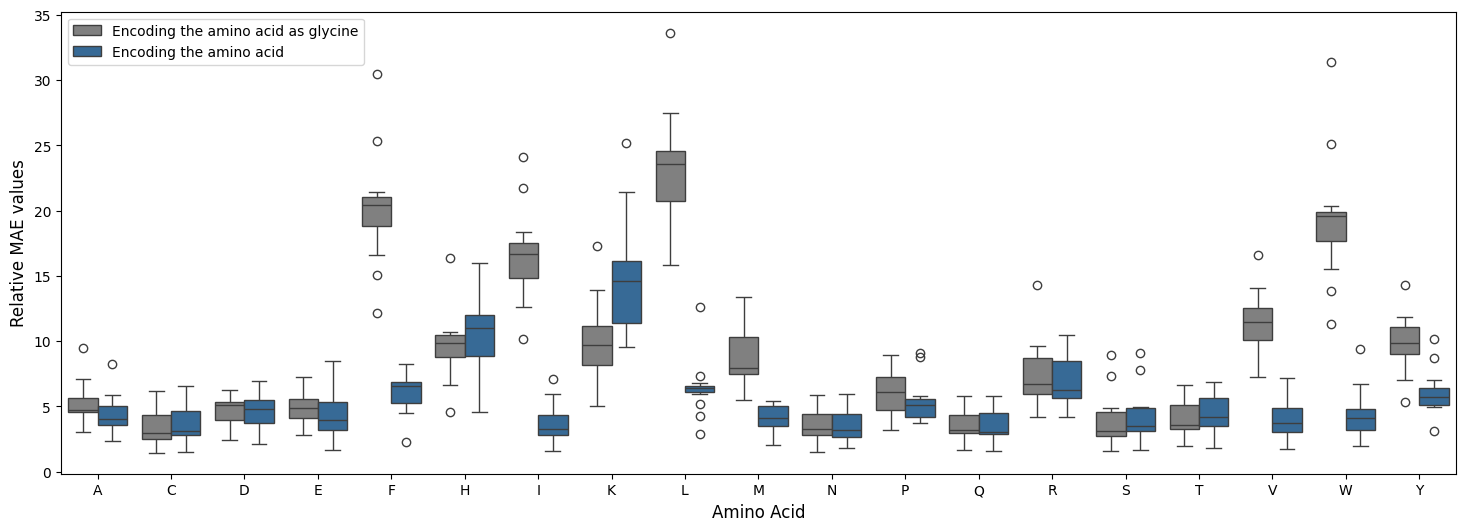

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[18, 6])

# Define paths to datasets
paths = [
    "arabidopsis", "hela1h", "hela2h", "heladeeprt", "helahf",
    "pancreas", "plasma1h", "plasma2h", "proteometools", "proteometoolsptm",
    "swath", "yeast1h", "yeast2h", "yeastdeeprt", "diahf"
]

# Define amino acids and other parameters
aas = ['A', 'C', 'D', 'E', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# Normalization factors for each dataset (calculated based on max-min of iRT values)
dataset_normalizer = [
    78.93, 35.81, 71.6, 50.01, 11.4, 62.27, 44.88, 71.92, 16.2, 0.54,
    145.66, 33.56, 69.02, 149.07, 3.17713
]

# Dictionary to store the normalized 'r' values for each amino acid
aa_mae_values = {aa: [] for aa in aas}

# Iterate over datasets
for i, dataset in enumerate(paths):
    base_path = f"../saved_model/modified_glycine_evaluation/{dataset}/"

    mae_values_per_path = {aa: None for aa in aas}  # Ensure dictionary structure

    for aa in aas:
        file_path = f"{base_path}{aa}_best_results.csv"
        try:
            df = pd.read_csv(file_path, index_col=0)

            # Normalize values
            normalizer = dataset_normalizer[i]
            df["y_test"] = df["y_test"] / normalizer
            df["output_test"] = df["output_test"] / normalizer
            df["output_test_g"] = df["output_test_g"] / normalizer

            # Compute Mean Absolute Error (MAE)
            mae = (abs(df["output_test"] - df["y_test"])).sum() / len(df.index)
            mae_glyc = (abs(df["output_test_g"] - df["y_test"])).sum() / len(df.index)

            mae_values_per_path[aa] = (mae_glyc, mae)
        except FileNotFoundError:
            print(f"File not found: {file_path}")
            mae_values_per_path[aa] = None  # Ensure missing values don't break indexing

    # Store results in the dictionary
    for aa in aas:
        if mae_values_per_path[aa] is not None:
            aa_mae_values[aa].append(mae_values_per_path[aa])

# Prepare data for plotting
data = []
for aa in aas:
    for mae, mae_glyc in aa_mae_values[aa]:
        data.append([aa, mae, "Encoding the amino acid"])
        data.append([aa, mae_glyc, "Encoding the amino acid as glycine"])

df_aa = pd.DataFrame(data, columns=["Amino Acid", "Relative MAE values", "Type"])

# Create boxplot using seaborn
sns.boxplot(x="Amino Acid", y="Relative MAE values", data=df_aa, hue="Type", palette=["grey", "#276ba6"])
ax = plt.gca()

# Adjust legend and labels
handles, _ = ax.get_legend_handles_labels()
plt.xlabel("Amino Acid", fontsize=12)
plt.ylabel("Relative MAE values", fontsize=12)
ax.legend(handles, ["Encoding the amino acid as glycine", "Encoding the amino acid"])

# Define save path dynamically
save_path = "../saved_model/modified_glycine_evaluation/"
os.makedirs(save_path, exist_ok=True)  # Ensure the directory exists
plt.savefig(f"{save_path}aa_cv_boxplot.png", dpi=300)

plt.show()


# Number of peptides in test to train set ratio

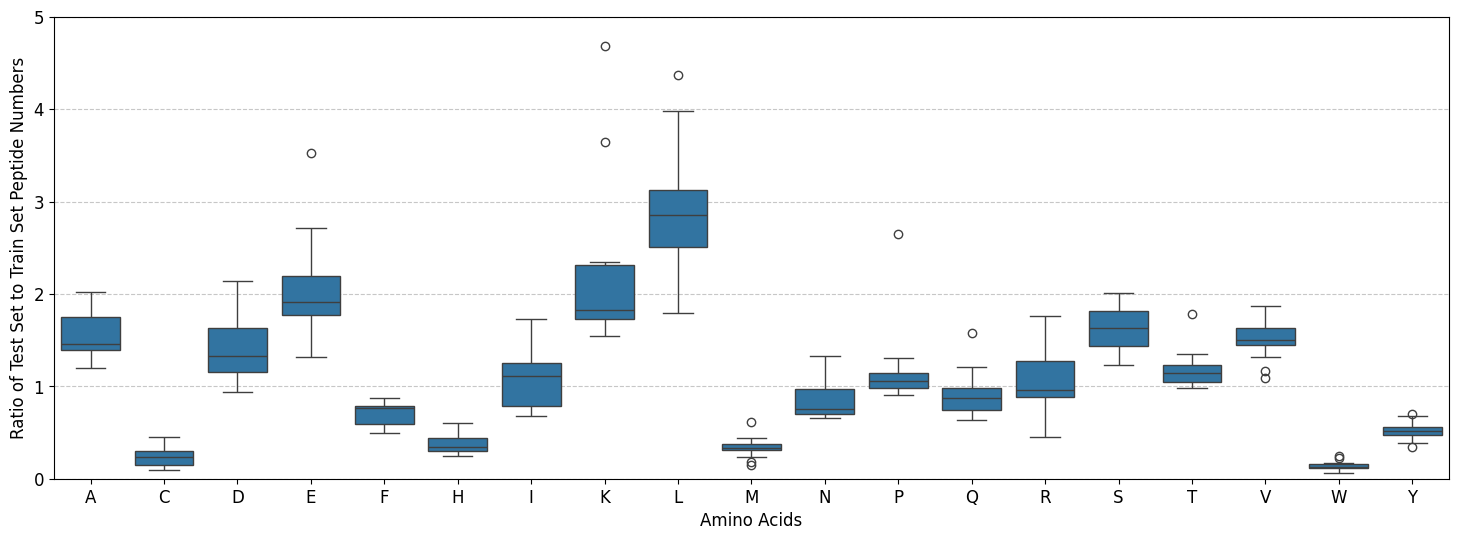

In [13]:
# Dictionary to store the ratio of test set to train set peptide numbers
ratio = {aa: [] for aa in aas}

# Iterate over datasets
for dataset in paths:
    base_path = f"../saved_model/modified_glycine_evaluation/{dataset}/"

    # Special case for "diahf"
    path_name =  dataset

    # Read number of training and testing peptides for each amino acid
    num_train_pep = {}
    num_test_pep = {}

    for aa in aas:
        train_file = f"../data/modified_glycine_evaluation/{path_name}_{aa}_train.csv"
        test_file = f"../data/modified_glycine_evaluation/{path_name}_{aa}_test.csv"

        try:
            num_train_pep[aa] = pd.read_csv(train_file).shape[0]
            num_test_pep[aa] = pd.read_csv(test_file).shape[0]

            # Compute ratio and store it
            ratio[aa].append(num_test_pep[aa] / num_train_pep[aa])
        except FileNotFoundError:
            print(f"File not found: {train_file} or {test_file}")
            ratio[aa].append(None)  # Preserve structure with None for missing data

# Prepare data for plotting
data = [[aa, r] for aa in aas for r in ratio[aa] if r is not None]  # Remove None values

df_ratio = pd.DataFrame(data, columns=["Amino Acid", "Ratio"])

# Set up the plot
plt.figure(figsize=[18, 6])
sns.boxplot(x="Amino Acid", y="Ratio", data=df_ratio)

# Customize the plot
plt.xlabel("Amino Acids", fontsize=12)
plt.ylabel("Ratio of Test Set to Train Set Peptide Numbers", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 5)

# Define save path dynamically
save_path = "../saved_model/modified_glycine_evaluation/"
os.makedirs(save_path, exist_ok=True)  # Ensure the directory exists
plt.savefig(f"{save_path}test_train_ratio_boxplot_zoomed.png", dpi=300)

plt.show()
